<a href="https://colab.research.google.com/github/ChowMeins/PyTorch-Tutorial-freecodecamp/blob/main/02_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What we're covering:

* Data (prepare and load)
* Build a model
* Fitting the model to data (training)
* Making predictions and evaluating a model (inference)
* Saving and loading a model
* Putting it all together

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.8.0+cu126'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

ML has two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Let's use a linear regression formula to make a straight line w/ known **parameters**.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # Linear regression formula: y = a + bX
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Splitting data into training and test sets


In [ ]:
# Splitting data into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualizing data

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  """
  Plots training data, test data, and compares predictions
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
      # Plot the predictions in red (predictions were made on the test data)
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show legend
  plt.legend(prop={"size": 14})

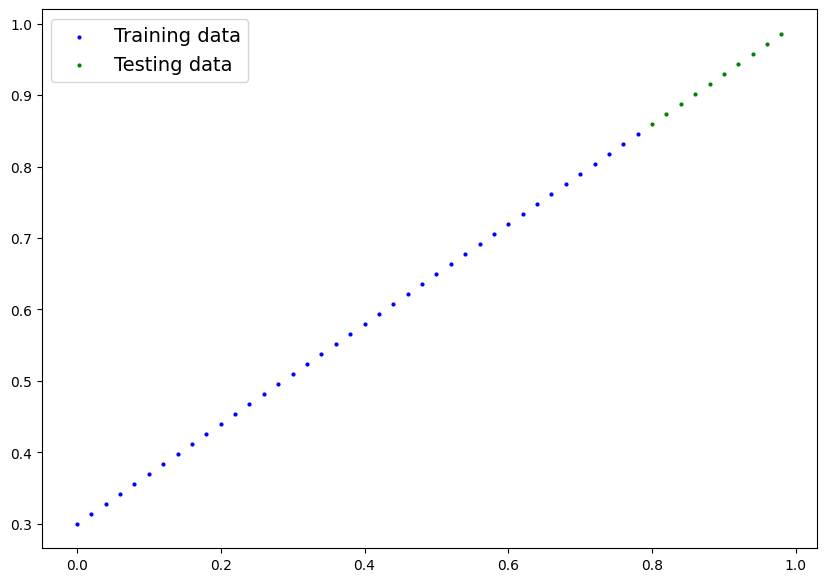

In [ ]:
plot_predictions()

## 2. Build model

Very first PyTorch model!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

Two main algorithms:
1. Gradient descent
2. Back propagation


In [ ]:
import torch
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data, returns
    return self.weights * x + self.bias

### PyTorch building essentials

* torch.nn - contains all buildings for computational graphs
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTortch layer from torch.nn will set for us
* torch.nn.Module - Base class for all Neural Network modules, overwrite forward if subclassed
* torch.optim - optimizers in PyTorch, help w/ gradient descent
* def forward() - All nn module subclasses require you to overwrite forward(), defines what happens in forward computation



### Checking the contents of our PyTorch model

Check model parameters using .parameters()

In [ ]:
#torch.manual_seed(42)

# Create an instance of this model and look at parameters
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making prediction using `torch.inference_mode()`
Let's see how well it predicts y_test based on X_test

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
model_0(X_test)

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also use torch.no_grad(), but inference_mode() is preferred
#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

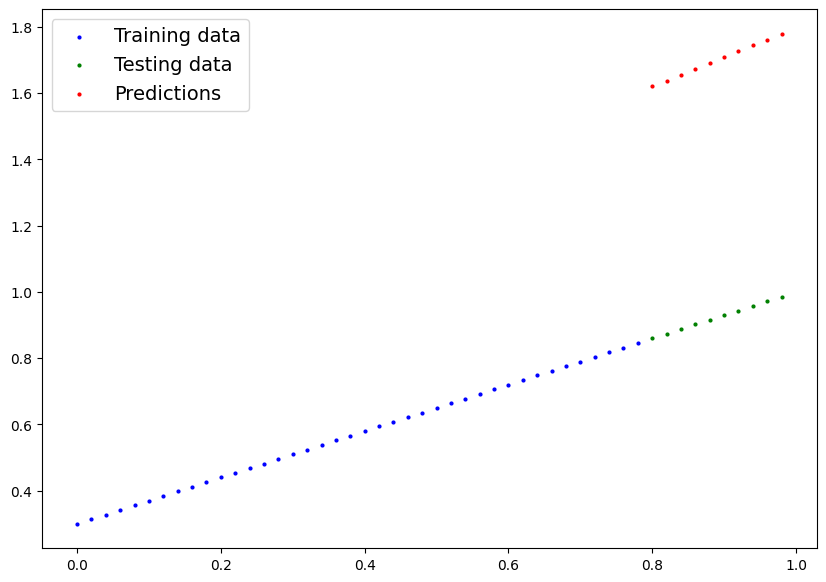

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train model

The idea of training is for a model to move from some unknown parameters (may be random) to some known parameters.

In other words, from a poor representation -> better representation of data

One way to measure how poor or how wrong a model's predictions are is to use a loss function.

Things we need to train:

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# See our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

**Which loss function and optimizer to use?**

Depends on the problem, but with experience you have an idea of what works/doesn't.

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr = learning rate, one of the most important hyperparameter you can set

### Building a training loop (and a testing loop) in PyTorch

Things we need in a training loop:
1. Loop through data
2. Forward pass (involves data moving through our model's `forward()` function) to make predictions on data (also called forward propagation)
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
torch.manual_seed(42)
epoch_count = []
train_loss_values = []
test_loss_values = []

# Epoch - 1 loop through the data (a hyperparameter because we've set it ourselves)
epochs = 200

# 1. Loop through data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # Sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"Loss: {loss}")
  # 3. Optimizer zero grad - zero the gradients of the optimzier (they accumulate by default)
  optimizer.zero_grad()

  # 4. Perform back propagation on the loss w/ respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # By default how the optimizer changes will accumulate through the loop, so we have to zero them above in step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off gradient in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      epoch_count.append(epoch)
      train_loss_values.append(loss.numpy())
      test_loss_values.append(test_loss.numpy())
  #print(model_0.state_dict())

Loss: 0.6860889196395874
Epoch: 0 | Loss: 0.6860889196395874 | Test loss: 0.7637526988983154
Loss: 0.6745679974555969
Loss: 0.6630470156669617
Loss: 0.6515260338783264
Loss: 0.6400049924850464
Loss: 0.6284840703010559
Loss: 0.6169630289077759
Loss: 0.6054420471191406
Loss: 0.5939210653305054
Loss: 0.5824000239372253
Loss: 0.5708791017532349
Epoch: 10 | Loss: 0.5708791017532349 | Test loss: 0.6290428042411804
Loss: 0.5593580603599548
Loss: 0.5478371381759644
Loss: 0.5363161563873291
Loss: 0.5247951149940491
Loss: 0.5132741332054138
Loss: 0.5017532110214233
Loss: 0.4902321696281433
Loss: 0.47871121764183044
Loss: 0.4671902060508728
Loss: 0.45566922426223755
Epoch: 20 | Loss: 0.45566922426223755 | Test loss: 0.4943329691886902
Loss: 0.4441482126712799
Loss: 0.43262726068496704
Loss: 0.4211062490940094
Loss: 0.40958523750305176
Loss: 0.3980643153190613
Loss: 0.38654330372810364
Loss: 0.375022292137146
Loss: 0.36350134015083313
Loss: 0.3519803285598755
Loss: 0.34045934677124023
Epoch: 30 | 

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

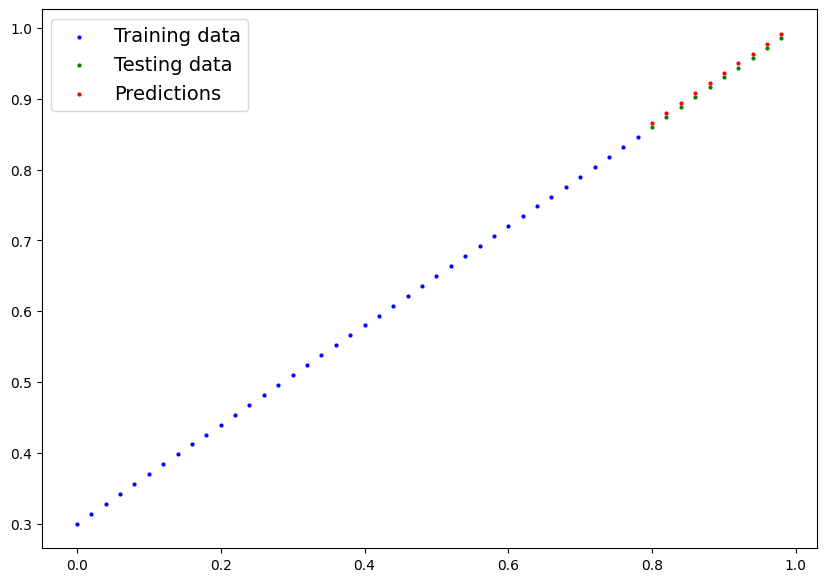

In [ ]:
plot_predictions(predictions=y_preds_new)

In [ ]:
weight, bias

(0.7, 0.3)

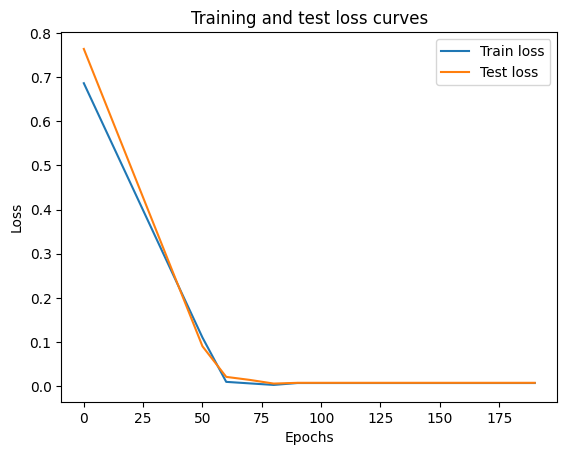

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

There are 3 main methods to save and load modals in PyTorch

1. `torch.save()` - saves a PyTorch object in Python's pickle format
2. `torch.load()` - loads a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - loads a model's saved satate dictionary

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict()
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
# To load in a saved state_dict, instantate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [ ]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

### 6. Putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# Create some of the data using the linear regression formula, y = weight * X + bias
weight = 0.8
bias = 0.2

# Create range values
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Split the data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

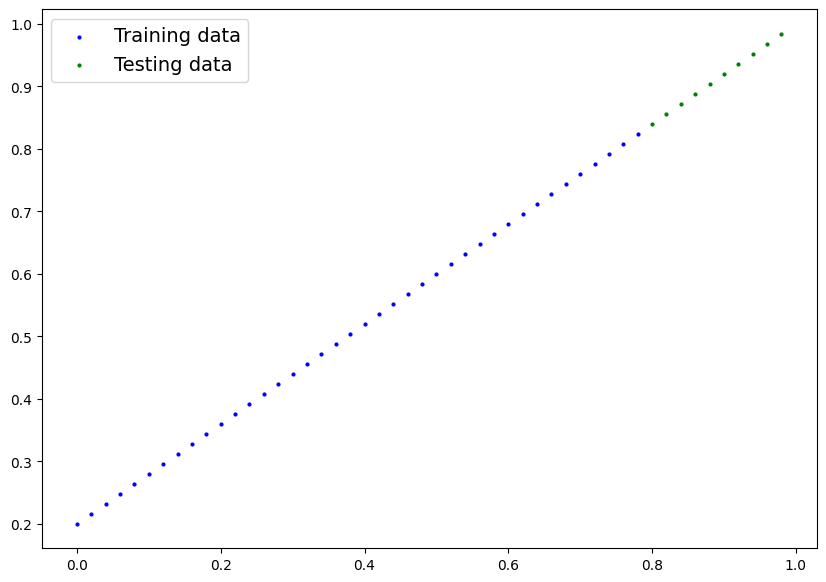

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
  def forward(self, x: torch.Tensor):
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 6.3 Training

For training we need:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
# Write the training loop
epochs = 200

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.6161779165267944 | Test loss: 0.584976315498352
Epoch: 10 | Loss: 0.5009680986404419 | Test loss: 0.45026636123657227
Epoch: 20 | Loss: 0.3857582211494446 | Test loss: 0.3155565857887268
Epoch: 30 | Loss: 0.2705483138561249 | Test loss: 0.18084672093391418
Epoch: 40 | Loss: 0.15533843636512756 | Test loss: 0.04613689333200455
Epoch: 50 | Loss: 0.05875825136899948 | Test loss: 0.06886560469865799
Epoch: 60 | Loss: 0.04580377787351608 | Test loss: 0.0947304219007492
Epoch: 70 | Loss: 0.04181947931647301 | Test loss: 0.09405827522277832
Epoch: 80 | Loss: 0.03831038624048233 | Test loss: 0.08853326737880707
Epoch: 90 | Loss: 0.034879542887210846 | Test loss: 0.08094760030508041
Epoch: 100 | Loss: 0.03144557401537895 | Test loss: 0.07267506420612335
Epoch: 110 | Loss: 0.028006773442029953 | Test loss: 0.0644025206565857
Epoch: 120 | Loss: 0.024577608332037926 | Test loss: 0.056816864758729935
Epoch: 130 | Loss: 0.021141955628991127 | Test loss: 0.04854437708854675
Epoch: 

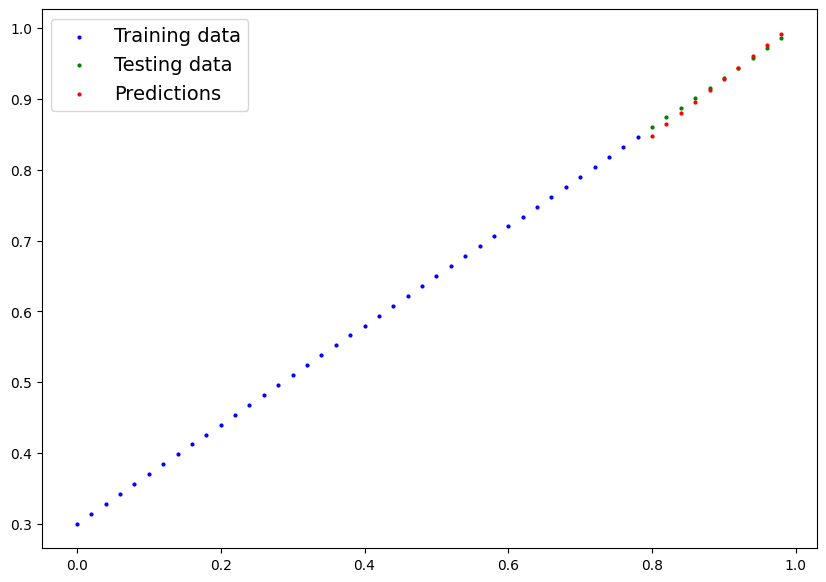

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(predictions=y_preds)

In [ ]:
## 6.5 Saving and loading a trained model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dictionary
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
# Loading the saved model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7987]])),
             ('linear_layer.bias', tensor([0.2095]))])

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])